In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 2.4 MB/s eta 0:02:43
   ---------------------------------------- 0.3/390.3 MB 3.8 MB/s eta 0:01:43
   ---------------------------------------- 0.5/390.3 MB 4.4 MB/s eta 0:01:29
   ---------------------------------------- 0.5/390.3 MB 4.4 MB/s eta 0:01:29
   ---------------------------------------- 0.5/390.3 MB 2.7 MB/s eta 0:02:23
   ---------------------------------------- 0.6/390.3 MB 2.6 MB/s eta 0:02:31
   ---------------------------------------- 0.9/390.3 MB 3.0 MB/s eta 0:02:09
   ---------------------------------------- 0.9/390.3 MB 2.7 MB/s eta 0:02:22
   ---------------------------------------- 1.0/390.3 MB 2.9 MB/s eta 0:02:15
   ---------------------------------------- 1.1/390.3 MB 2.7 MB/s eta 0:02:

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


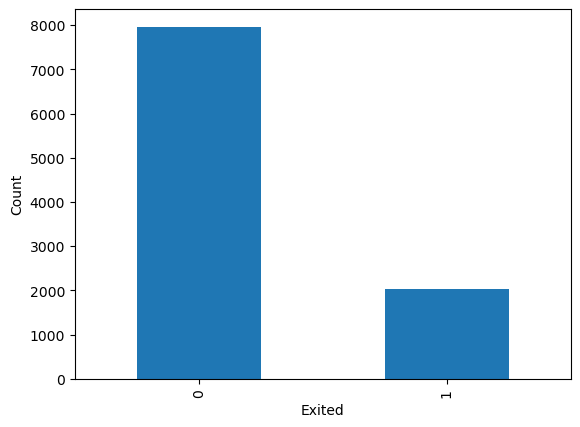

In [6]:
plt.xlabel('Exited')
plt.ylabel('Count')
df['Exited'].value_counts().plot.bar()
plt.show()

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df = pd.concat([df,pd.get_dummies(df['Geography'],prefix='Geo')],axis=1)

In [9]:
df = pd.concat([df,pd.get_dummies(df['Gender'])],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geo_France       10000 non-null  bool   
 15  Geo_Germany      10000 non-null  bool   
 16  Geo_Spain        10000 non-null  bool   
 17  Female       

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


### Splitting Data

In [13]:
y = df['Exited'].values
x = df.loc[:,df.columns != 'Exited'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=20,test_size=0.25)

### Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

In [16]:
x_train.shape

(7500, 13)

### Tensorflow Model - Neural Network Classifier

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv1D,Flatten
from tensorflow.keras.models import Sequential, Model

In [18]:
model=Sequential()
model.add(Flatten(input_shape=(13,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='BinaryCrossentropy')

In [20]:
model.fit(x_train,y_train,batch_size=64,validation_split=0.1,epochs=100)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7795 - loss: 0.5238 - val_accuracy: 0.8200 - val_loss: 0.4193
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4275 - val_accuracy: 0.8267 - val_loss: 0.4017
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8223 - loss: 0.4034 - val_accuracy: 0.8373 - val_loss: 0.3890
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.4029 - val_accuracy: 0.8520 - val_loss: 0.3678
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.3871 - val_accuracy: 0.8573 - val_loss: 0.3502
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.3674 - val_accuracy: 0.8720 - val_loss: 0.3439
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3494 - val_accuracy: 0.8760 - val_loss: 0.3335
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.3644 - val_accu

In [21]:
pred = model.predict(x_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
y_pred = []
for val in pred:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [24]:
accuracy_score(y_test,y_pred)

0.8568

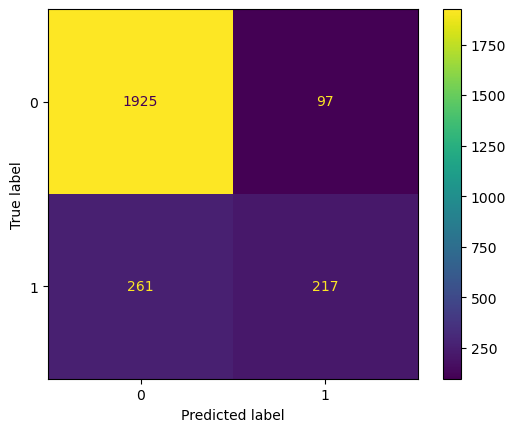

In [25]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=300,)
nn_classifier.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=300)

In [28]:
y_pred2 = nn_classifier.predict(x_test)

In [29]:
accuracy_score(y_pred=y_pred2,y_true=y_test)

0.862

In [30]:
nn_classifier.score(x_test,y_test)

0.862